In [83]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [84]:
data = pd.read_csv('train.csv')
X = data.drop(['id', 'loan_status'], 1)
X

,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type
0,609.296068,3 years,8.421982,A5,0 years,debt_consolidation,714.061803,Individual
1,1183.266999,5 years,10.286776,B1,10 years,credit_card,697.706701,Individual
2,695.783256,3 years,14.723425,C2,1 year,debt_consolidation,656.419357,Individual
3,738.392546,3 years,14.260708,C1,0 years,credit_card,657.906852,Individual
4,1642.400654,5 years,25.217452,E5,10 years,debt_consolidation,662.972297,Individual
...,...,...,...,...,...,...,...,...
242145,2427.939262,3 years,13.673803,B4,8 years,debt_consolidation,657.206417,Individual
242146,1224.346665,3 years,11.793595,B3,10 years,debt_consolidation,699.763028,Individual
242147,2089.513458,3 years,8.218123,A4,1 year,other,724.556339,Individual
242148,3459.367114,3 years,14.875958,C2,9 years,debt_consolidation,688.249378,Individual


In [85]:
X.describe()

,loan_amnt,interest_rate,credit_score
count,242150.000000,242150.000000,242150.000000
mean,1520.389009,13.801496,683.575024
std,830.250197,4.588924,29.554795
min,323.797279,5.704849,655.424269
25%,761.954545,10.876086,659.531106
50%,1212.680586,13.543833,678.672563
75%,2152.213330,17.172395,698.591960
max,3851.867974,27.980604,808.551641


#### 1. Deal with **loan amount**

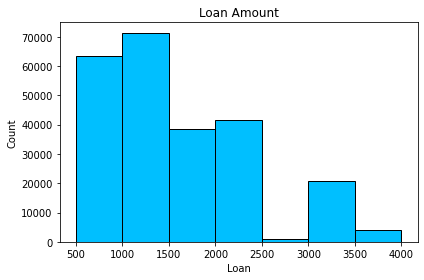

In [86]:
bins = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
plt.hist(X['loan_amnt'], bins=bins, edgecolor='black', color='deepskyblue')
plt.title('Loan Amount')
plt.xlabel('Loan')
plt.ylabel('Count')

plt.tight_layout()

plt.show()

#### Normalize **loan amount**

In [87]:
min_max_scaler = MinMaxScaler()
loan_amnt = X[['loan_amnt']].values
loan_amnt_norm = min_max_scaler.fit_transform(loan_amnt)
X['loan_amnt'] = loan_amnt_norm

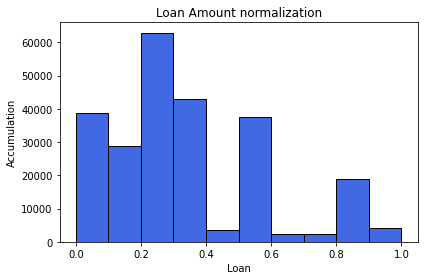

In [88]:
plt.hist(loan_amnt_norm, edgecolor='black', color='royalblue')
plt.title('Loan Amount normalization')
plt.xlabel('Loan')
plt.ylabel('Accumulation')

plt.tight_layout()

plt.show()

#### 2.Deal with **term** by map function

In [89]:
X['term'].value_counts()

3 years    189887
5 years     52263
Name: term, dtype: int64

In [90]:
X['term'] = X['term'].map({'3 years': 0, '5 years': 1})

In [91]:
X['term'].value_counts()

0    189887
1     52263
Name: term, dtype: int64

#### 3.Normalize **interest_rate**

In [92]:
interest_rate = X[['interest_rate']].values
interest_rate_norm = min_max_scaler.fit_transform(interest_rate)
X['interest_rate'] = interest_rate_norm

#### 4.Normalize **credit_score**

In [93]:
credit_score = X[['credit_score']].values
credit_score_norm = min_max_scaler.fit_transform(credit_score)
X['credit_score'] = credit_score_norm

#### 4.Normalize **employment length** 

In [94]:
X['employment_length'].value_counts()

10 years    103339
0 years      19373
9 years      18374
2 years      15783
1 year       15141
6 years      14815
4 years      13418
5 years      12812
7 years      12673
3 years      11295
8 years       5127
Name: employment_length, dtype: int64

In [95]:
emp_years = []
for emp_len in X['employment_length']:
    emp_year = emp_len.split(' ')[0]
    emp_years.append(int(emp_year))
X['employment_length'] = emp_years

In [96]:
emp_len = X[['employment_length']].values
emp_len_norm = min_max_scaler.fit_transform(emp_len)
X["employment_length"] = emp_len_norm

#### Deal with **application type**

In [97]:
X['application_type'] = X['application_type'].map({'Individual': 1, 'Joint App': 0})

#### Categorize **purpose**

In [98]:
X['purpose'].value_counts()

debt_consolidation    160207
credit_card            48900
other                  17633
home_improvement        7686
car                     3855
medical                 3154
small_business           449
major_purchase           262
house                      4
Name: purpose, dtype: int64

In [99]:
dummies = pd.get_dummies(X['purpose'],prefix="purpose_")
X = X.drop('purpose', 1)
X = pd.concat([X, dummies], axis=1)

#### Categorize **grade**

In [100]:
dummies = pd.get_dummies(X['grade'],prefix="grade_")
X = X.drop('grade', 1)
X = pd.concat([X, dummies], axis=1)

In [101]:
X

,loan_amnt,term,interest_rate,employment_length,credit_score,application_type,purpose__car,purpose__credit_card,purpose__debt_consolidation,purpose__home_improvement,...,grade__D3,grade__D4,grade__D5,grade__E1,grade__E2,grade__E3,grade__E4,grade__E5,grade__F3,grade__F5
0,0.080922,0,0.121977,0.0,0.382933,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.243609,1,0.205691,1.0,0.276126,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.105436,0,0.404861,0.1,0.006498,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.117513,0,0.384088,0.0,0.016213,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.373746,1,0.875957,1.0,0.049292,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242145,0.596400,0,0.357741,0.8,0.011638,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
242146,0.255253,0,0.273335,1.0,0.289555,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
242147,0.500476,0,0.112826,0.1,0.451468,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
242148,0.888749,0,0.411708,0.9,0.214365,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
y = data['loan_status']

In [103]:
y.value_counts()

FullyPaid     199794
ChargedOff     42356
Name: loan_status, dtype: int64

In [104]:
y =y.map({'FullyPaid': 1, 'ChargedOff': 0})

In [105]:
y.value_counts()

1    199794
0     42356
Name: loan_status, dtype: int64

In [106]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [107]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(train_X, train_y)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(val_X, val_y)))

Accuracy of logistic regression classifier on test set: 0.83


#### Read test data

In [108]:
test_data = pd.read_csv('test.csv')
test_X = test_data.drop('id', 1)
test_X

,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type
0,1161.830205,3 years,13.105362,C1,10 years,credit_card,682.016083,Individual
1,2257.465815,5 years,14.196200,C5,10 years,debt_consolidation,668.240313,Individual
2,2182.137002,3 years,8.307772,A5,10 years,credit_card,703.277694,Individual
3,520.284912,3 years,6.956504,A2,7 years,debt_consolidation,731.138779,Individual
4,2303.349549,3 years,11.658497,B3,6 years,debt_consolidation,698.368991,Individual
...,...,...,...,...,...,...,...,...
26895,1169.767130,3 years,13.609916,B4,1 year,credit_card,656.939828,Individual
26896,2235.153322,3 years,7.248690,A2,10 years,credit_card,765.770393,Individual
26897,3272.971410,3 years,9.957002,B4,6 years,debt_consolidation,793.887391,Individual
26898,1607.397707,3 years,10.892554,B3,10 years,debt_consolidation,658.815541,Individual


In [109]:
loan_amnt = test_X[['loan_amnt']].values
loan_amnt_norm = min_max_scaler.fit_transform(loan_amnt)
test_X['loan_amnt'] = loan_amnt_norm

In [110]:
test_X['term'] = test_X['term'].map({'3 years': 0, '5 years': 1})

In [111]:
interest_rate = test_X[['interest_rate']].values
interest_rate_norm = min_max_scaler.fit_transform(interest_rate)
test_X['interest_rate'] = interest_rate_norm

In [112]:
credit_score = test_X[['credit_score']].values
credit_score_norm = min_max_scaler.fit_transform(credit_score)
test_X['credit_score'] = credit_score_norm

In [113]:
emp_years = []
for emp_len in test_X['employment_length']:
    emp_year = emp_len.split(' ')[0]
    emp_years.append(int(emp_year))
test_X['employment_length'] = emp_years

emp_len = test_X[['employment_length']].values
emp_len_norm = min_max_scaler.fit_transform(emp_len)
test_X["employment_length"] = emp_len_norm

In [114]:
test_X['application_type'] = test_X['application_type'].map({'Individual': 1, 'Joint App': 0})

In [115]:
dummies = pd.get_dummies(test_X['purpose'],prefix="purpose_")
test_X = test_X.drop('purpose', 1)
test_X = pd.concat([test_X, dummies], axis=1)

In [116]:
dummies = pd.get_dummies(test_X['grade'],prefix="grade_")
test_X = test_X.drop('grade', 1)
test_X = pd.concat([test_X, dummies], axis=1)

In [117]:
test_X

,loan_amnt,term,interest_rate,employment_length,credit_score,application_type,purpose__car,purpose__credit_card,purpose__debt_consolidation,purpose__home_improvement,...,grade__D1,grade__D2,grade__D3,grade__D4,grade__D5,grade__E1,grade__E2,grade__E3,grade__E4,grade__E5
0,0.233748,0,0.338255,1.0,0.170125,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.550417,1,0.388391,1.0,0.081955,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.528645,0,0.117750,1.0,0.306207,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.048324,0,0.055643,0.7,0.484529,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.563678,0,0.271754,0.6,0.274790,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26895,0.236042,0,0.361445,0.1,0.009627,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
26896,0.543968,0,0.069073,1.0,0.706184,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
26897,0.843926,0,0.193551,0.6,0.886144,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
26898,0.362529,0,0.236550,1.0,0.021632,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
X.columns

Index(['loan_amnt', 'term', 'interest_rate', 'employment_length',
       'credit_score', 'application_type', 'purpose__car',
       'purpose__credit_card', 'purpose__debt_consolidation',
       'purpose__home_improvement', 'purpose__house',
       'purpose__major_purchase', 'purpose__medical', 'purpose__other',
       'purpose__small_business', 'grade__A1', 'grade__A2', 'grade__A3',
       'grade__A4', 'grade__A5', 'grade__B1', 'grade__B2', 'grade__B3',
       'grade__B4', 'grade__B5', 'grade__C1', 'grade__C2', 'grade__C3',
       'grade__C4', 'grade__C5', 'grade__D1', 'grade__D2', 'grade__D3',
       'grade__D4', 'grade__D5', 'grade__E1', 'grade__E2', 'grade__E3',
       'grade__E4', 'grade__E5', 'grade__F3', 'grade__F5'],
      dtype='object')

In [119]:
test_X.columns

Index(['loan_amnt', 'term', 'interest_rate', 'employment_length',
       'credit_score', 'application_type', 'purpose__car',
       'purpose__credit_card', 'purpose__debt_consolidation',
       'purpose__home_improvement', 'purpose__house',
       'purpose__major_purchase', 'purpose__medical', 'purpose__moving',
       'purpose__other', 'purpose__small_business', 'grade__A1', 'grade__A2',
       'grade__A3', 'grade__A4', 'grade__A5', 'grade__B1', 'grade__B2',
       'grade__B3', 'grade__B4', 'grade__B5', 'grade__C1', 'grade__C2',
       'grade__C3', 'grade__C4', 'grade__C5', 'grade__D1', 'grade__D2',
       'grade__D3', 'grade__D4', 'grade__D5', 'grade__E1', 'grade__E2',
       'grade__E3', 'grade__E4', 'grade__E5'],
      dtype='object')

In [120]:
test_X['grade__F3'] = 0
test_X['grade__F5'] = 0
test_X = test_X.drop('purpose__moving', 1)

In [121]:
test_preds_logreg = logreg.predict(test_X)

In [122]:
output = pd.DataFrame({'id': test_data.id,
                       'Output': test_preds_logreg})

In [129]:
output.to_csv('submission_v1.csv', index=False)